In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

#
  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk,mTk',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': 0.00001,
                   # LambdaCDM parameters
                   'Omega_Lambda':0, 
                   'Omega_fld':0,
                   'Omega_smg' : -1,
                   'gravity_model' :'propto_omega',
                   'parameters_smg' :'10000., 1., 0.01, 0., 1.',
                   'expansion_model' :'lcdm',
                   'expansion_smg' : 0.5,
                   'output_background_smg' :10,
                   'skip_stability_tests_smg' : 'no',
                   'cs2_safe_smg' : 0.,
                   'D_safe_smg' : 0.,
                   'ct2_safe_smg' :0.,
                   'M2_safe_smg' : 0.,
                   'a_min_stability_test_smg' : 0.0001,
    
    
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'hubble_evolution' : 'y',
                   'hubble_friction' :3.,
                   'pert_initial_conditions_smg' : 'ext_field_attr',
                   
                   # other options and settings
                   'pert_ic_ini_z_ref_smg' : 1e10,    
                   'pert_ic_tolerance_smg' : 2e-2, 
                   'pert_ic_regulator_smg' : 1e-15,
                   'pert_qs_ic_tolerance_test_smg' : 10,
                   'method_qs_smg' : 'fully_dynamic',
                   'z_fd_qs_smg' : 10.,
                   'trigger_mass_qs_smg' : 1.e3,
                   'trigger_rad_qs_smg' : 1.e3, 
                   'eps_s_qs_smg' : 0.01,
                   'n_min_qs_smg' : 1e2,
                   'n_max_qs_smg' : 1e4,
                   'start_small_k_at_tau_c_over_tau_h' : 1e-4,
                   'start_large_k_at_tau_h_over_tau_k' : 1e-4,
                   'perturb_sampling_stepsize' : 0.05,
                   'l_logstep' : 1.045,
                   'l_linstep' : 50,
                   'gauge':'synchronous'}  

In [3]:
# call CLASS
#
M = Class()
M.set(common_settings)
M.compute()

In [4]:
transfer = M.get_transfer()  # this potentially constains scalars/tensors and all k values

In [5]:
transfer['Geff_smg']

array([1.33836774, 1.56354286, 1.92715485, 2.24247448, 2.39604481,
       2.47723503, 2.52422921, 2.55354471, 2.57294925, 2.58641295,
       2.59611561, 2.60332788, 2.60882841, 2.61311482, 2.61651669,
       2.6192591 , 2.62149985, 2.62335219, 2.62489905, 2.62620227,
       2.6273087 , 2.62825437, 2.62906733, 2.62976969, 2.63037906,
       2.63090962, 2.63137291, 2.63177836, 2.6321338 , 2.63244575,
       2.63271969, 2.63296028, 2.63317151, 2.63335683, 2.63351924,
       2.63366139, 2.6337856 , 2.63389397, 2.63398837, 2.63407045,
       2.63414174, 2.63420359, 2.6342572 , 2.63430367, 2.63434393,
       2.63437885, 2.63440915, 2.63443548, 2.63445841, 2.6344784 ,
       2.63449588, 2.6345112 , 2.63452466, 2.63453652, 2.634547  ,
       2.63455629, 2.63456454, 2.6345719 , 2.63457847, 2.63458437,
       2.63458966, 2.63459444, 2.63459875, 2.63460266, 2.63460621,
       2.63460944, 2.63461239, 2.63461509, 2.63461756, 2.63461982,
       2.63462191, 2.63462384, 2.63462562, 2.63462726, 2.63462

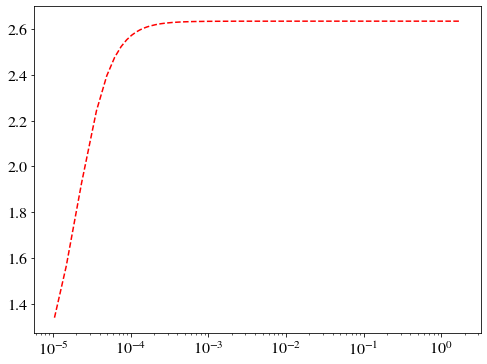

In [6]:
plt.plot(transfer['k (h/Mpc)'], transfer['Geff_smg'], 'r--')
plt.xscale('log')
plt.show()